<a href="https://colab.research.google.com/github/C9342-mhmt/Assignment/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## Indest Data

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


The features in the given dataset are:

rownumber: Row Numbers from 1 to 10000.

customerid: A unique ID that identifies each customer.

surname: The customer’s surname.

creditscore: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

geography: The country from which the customer belongs to.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time of being customer.

tenure: The number of years for which the customer has been with the bank.

balance: Bank balance of the customer.

numofproducts: the number of bank products the customer is utilising.

hascrcard: The number of credit cards given to the customer by the bank.

isactivemember: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [3]:
df.shape 

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [5]:
df.columns[-1] # last column is target

'Exited'

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.info() # to know the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum() # 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum() 

0

In [9]:
df = df.drop(["CustomerId","RowNumber","Surname",],axis=1)

In [10]:
#numerical variables

num = list(df.select_dtypes(include=[np.number]).columns)

#categorical variables

cat = list(df.select_dtypes(include='object').columns)

print(cat)

print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [11]:
for i in cat:
    print(df[i].value_counts())
    print("------")

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------
Male      5457
Female    4543
Name: Gender, dtype: int64
------


In [12]:
df.Exited.value_counts() # Target values

0    7963
1    2037
Name: Exited, dtype: int64

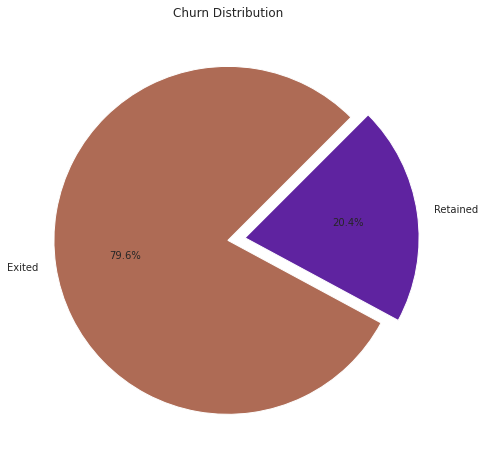

In [13]:
labels = 'Exited', 'Retained'
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.pie(df['Exited'].value_counts(), labels=labels,explode=explode,autopct='%1.1f%%', colors=color, startangle=45)
plt.title('Churn Distribution');

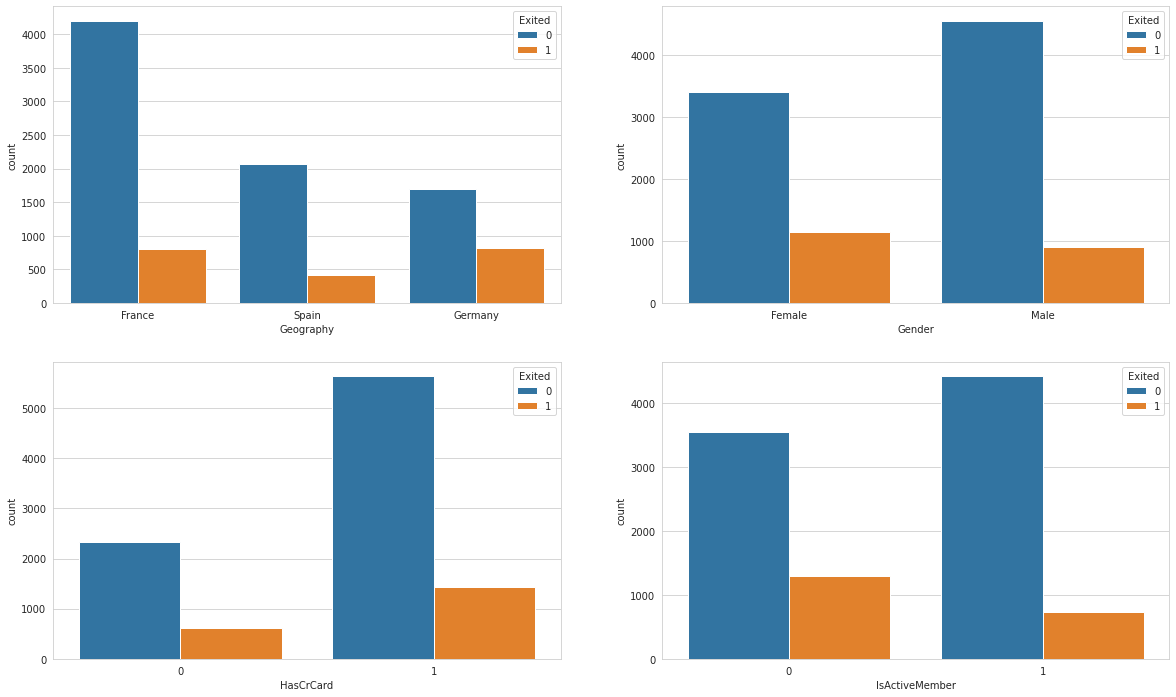

In [14]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

AttributeError: ignored

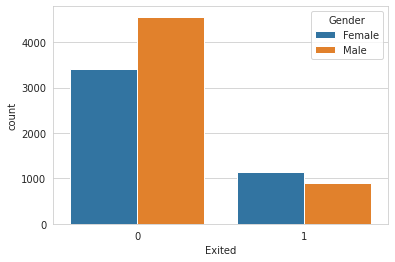

In [15]:
ax = sns.countplot(x='Exited',data=df,hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

AttributeError: ignored

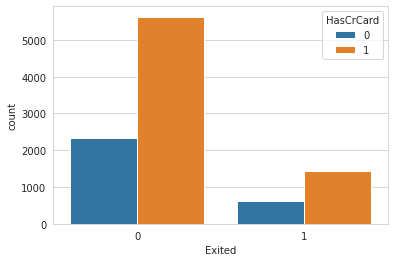

In [16]:
ax = sns.countplot(x='Exited',data=df, hue='HasCrCard')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

AttributeError: ignored

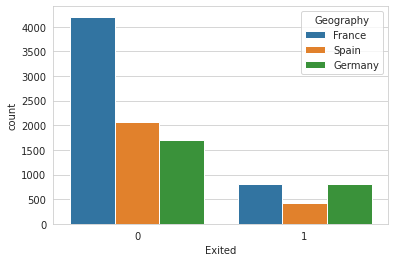

In [17]:
ax = sns.countplot(x='Exited',data=df, hue='Geography')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

AttributeError: ignored

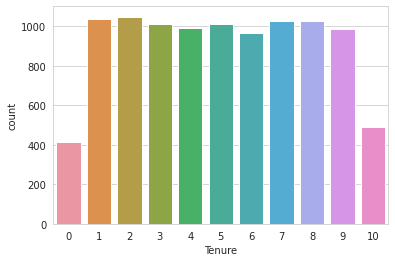

In [18]:
ax = sns.countplot(df["Tenure"]);
ax.bar_label(ax.containers[0]);

AttributeError: ignored

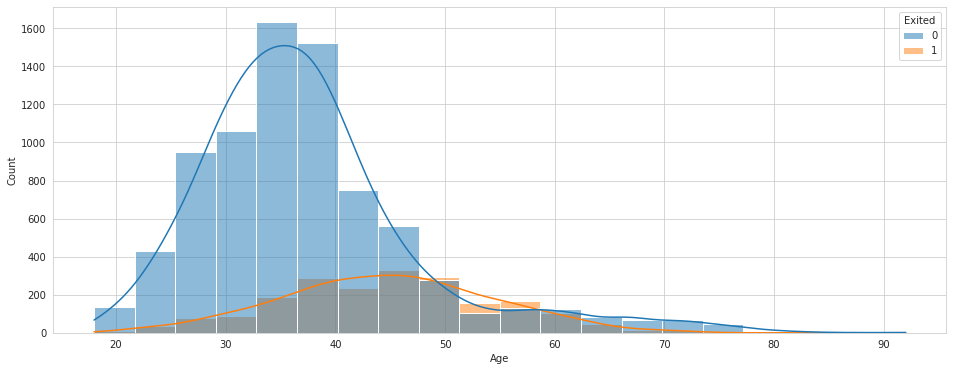

In [19]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x="Age",bins=20, hue="Exited", kde=True);
ax.bar_label(ax.containers[0]);

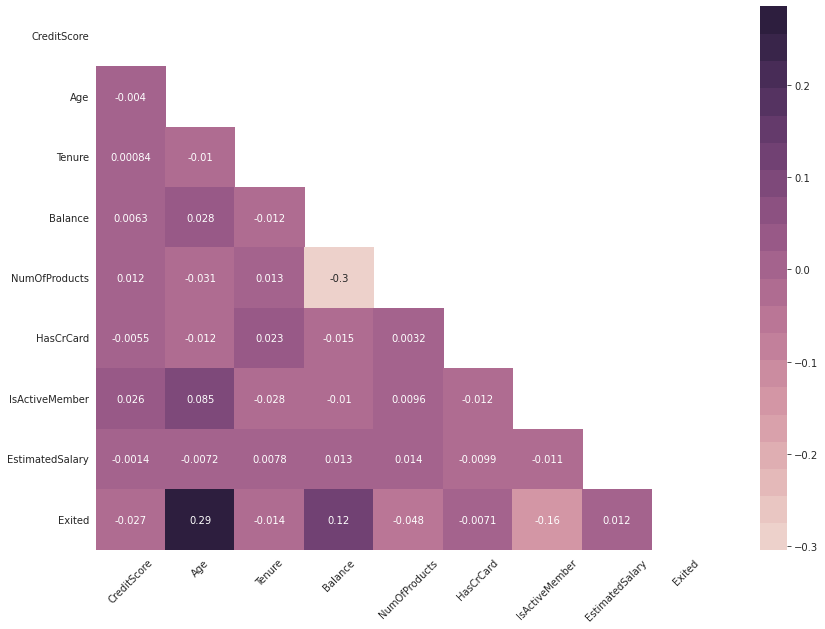

In [21]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(20), mask=matrix)

plt.xticks(rotation=45);

AttributeError: ignored

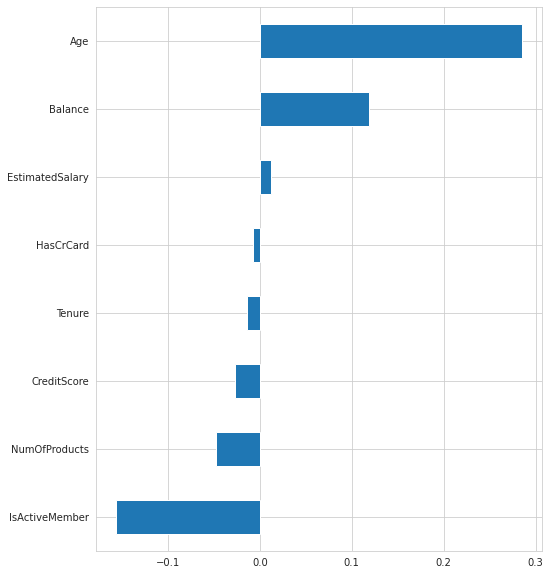

In [20]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh")
ax.bar_label(ax.containers[0]);

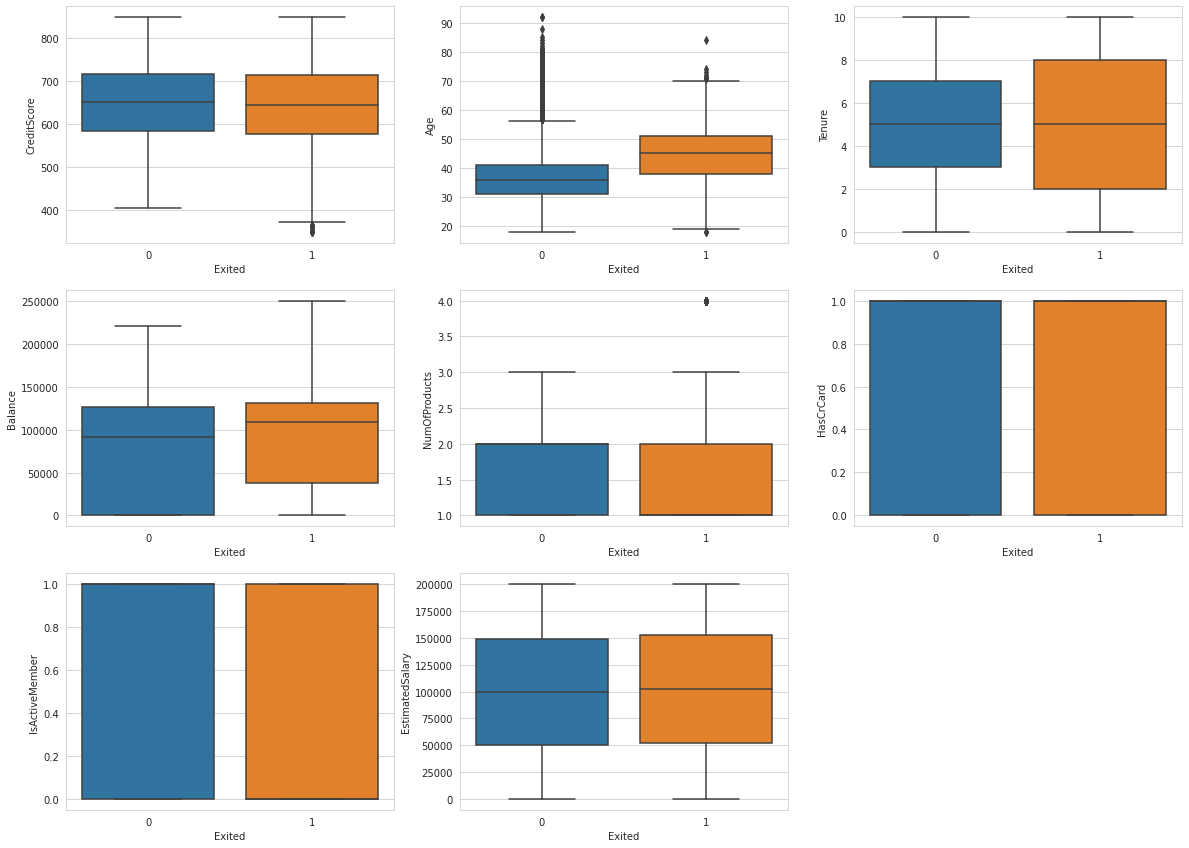

In [22]:
index = 0
plt.figure(figsize=(20,20))
for feature in num:
    if feature != "Exited":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='Exited', y=feature, data=df)

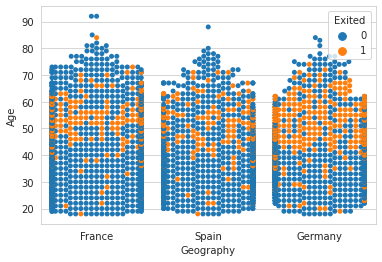

In [23]:
sns.swarmplot(y="Age", x="Geography", hue="Exited", data=df);

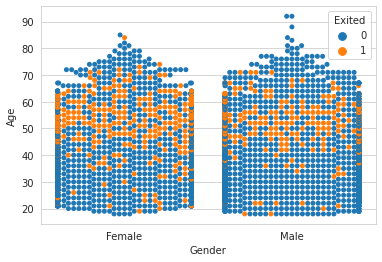

In [25]:
sns.swarmplot(y="Age", x="Gender", hue="Exited", data=df);

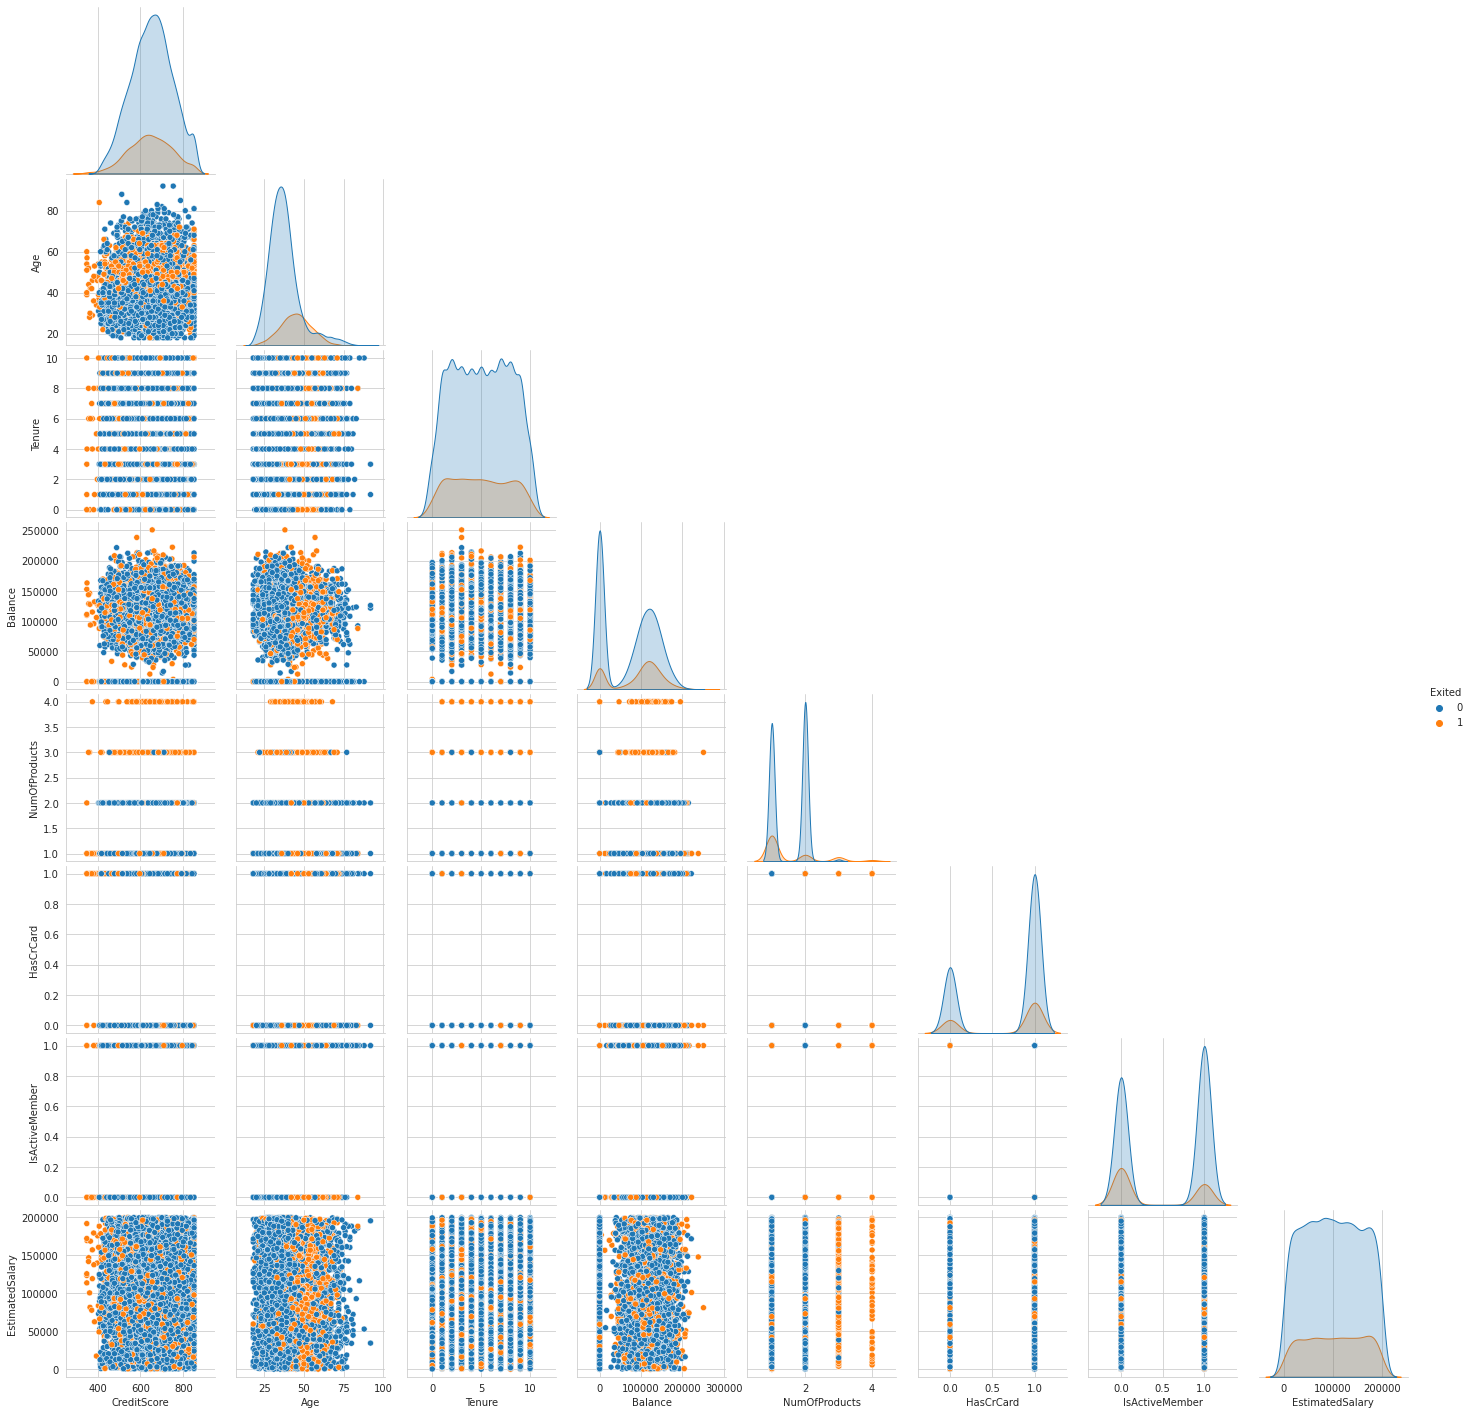

In [24]:
sns.pairplot(df, hue="Exited", corner=True);

In [26]:
df.insert(11, 'churn', df['Exited'])


In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,churn
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0


In [28]:
df.drop('Exited', axis=1, inplace=True)

In [29]:
df = pd.get_dummies(df, drop_first =True)

In [30]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [33]:
seed = 42

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=seed)


In [35]:
from sklearn.preprocessing import MinMaxScaler


In [36]:
scaler = MinMaxScaler()


In [37]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
print(X_train.shape)   
print(X_test.shape) 

(8000, 11)
(2000, 11)


In [39]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)


## Modelling & Model Performance

### Import related libraries

In [43]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [44]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Creating Model

### without class_weigth

In [45]:
""" class_weight: Optional dictionary mapping class indices (integers)
        to a weight (float) value, used for weighting the loss function
        (during training only).
        This can be useful to tell the model to
        "pay more attention" to samples from
        an under-represented class."""


# define sequential model

model = Sequential()
model.add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(5,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model.summary()


# compile the model

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data
model.fit(x = X_train, y = y_train, epochs=250, validation_split = 0.1, batch_size=32,verbose=1,callbacks = [early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
225/225 [==============================] - 3s 6ms/step - loss: 0.6479 - accuracy: 0.7133 - val_loss: 0.5002 - val_accuracy: 0.8100
Epoch 2/250
225/225 [==========================

In [46]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.648,0.713,0.500,0.810
1,0.483,0.795,0.456,0.810
2,0.468,0.795,0.447,0.810
3,0.459,0.796,0.440,0.812
4,0.449,0.807,0.438,0.811


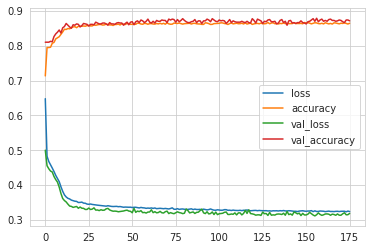

In [48]:
loss_df.plot();

#### Evaluate

In [49]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.3374 - accuracy: 0.8640


[0.33738845586776733, 0.8640000224113464]

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33738845586776733
accuracy :  0.8640000224113464


In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1525   68]
 [ 204  203]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [52]:
from sklearn.utils import class_weight

In [53]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(y_train),
                                                 y = y_train)

In [54]:
""" class_weight: Optional dictionary mapping class indices (integers)
        to a weight (float) value, used for weighting the loss function
        (during training only).
        This can be useful to tell the model to
        "pay more attention" to samples from
        an under-represented class."""


# define sequential model

# define sequential model

model_weighted  = Sequential()
model_weighted .add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
model_weighted .add(Dense(10, activation='relu'))
model_weighted .add(Dense(5,  activation = 'relu'))
model_weighted .add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model_weighted .summary()


# compile the model
opt = Adam(lr = 0.005)

model_weighted .compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data

class_weight = {0:0.62794349 , 1:2.45398773}

model_weighted .fit(x=X_train, y=y_train, epochs=250, batch_size=32, validation_split = 0.1, verbose=1, class_weight=class_weight,
          callbacks = [early_stop])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                180       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
225/225 [==============================] - 2s 6ms/step - loss: 0.6489 - accuracy: 0.5900 - val_loss: 0.6485 - val_accuracy: 0.6938
Epoch 2/250
225/225 [========================

In [55]:
model_weighted .summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                180       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [56]:
loss_df = pd.DataFrame(model_weighted .history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.649,0.590,0.649,0.694
1,0.580,0.724,0.518,0.811
2,0.531,0.765,0.527,0.765
3,0.513,0.775,0.572,0.734
4,0.503,0.774,0.460,0.799


#### Evaluate

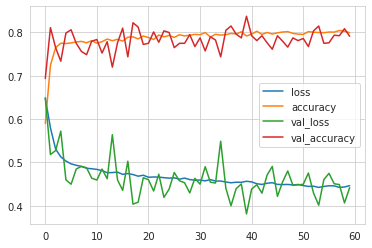

In [57]:
loss_df.plot();

In [58]:
model_weighted .evaluate(X_test, y_test, verbose=0)

[0.4562012851238251, 0.7839999794960022]

In [59]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4562012851238251
accuracy :  0.7839999794960022


In [60]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1261  332]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.75      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000



## GridSearchCV

In [61]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [62]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [63]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)



grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
113/113 [==============================] - 2s 4ms/step - loss: 0.5369 - accuracy: 0.7604 - val_loss: 0.4614 - val_accuracy: 0.8100
Epoch 2/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7957 - val_loss: 0.4433 - val_accuracy: 0.8138
Epoch 3/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8050 - val_loss: 0.4251 - val_accuracy: 0.8238
Epoch 4/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8164 - val_loss: 0.4197 - val_accuracy: 0.8338
Epoch 5/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8225 - val_loss: 0.4010 - val_accuracy: 0.8425
Epoch 6/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8282 - val_loss: 0.3972 - val_accuracy: 0.8462
Epoch 7/200
113/113 [==============================] - 0s 3ms/step - loss: 0.40

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f610c177fd0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [65]:
grid_model.best_score_

0.8579999999999999

In [66]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [67]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by='rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
19,0.858,0.014,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
20,0.857,0.012,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
16,0.857,0.015,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
5,0.857,0.015,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
23,0.856,0.015,5,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
4,0.856,0.010,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
12,0.856,0.012,6,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
3,0.855,0.010,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
0,0.855,0.014,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
11,0.855,0.012,10,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


In [68]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1552   41]
 [ 243  164]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1593
           1       0.80      0.40      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



#### Evaluate

The Evaluation of ROC and AUC for Model without "class_weigth"

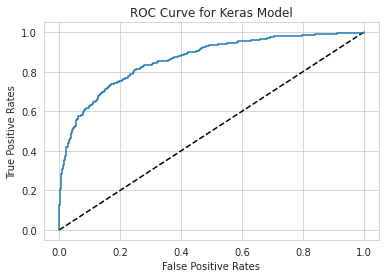

In [69]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [70]:
roc_auc_score(y_test, y_pred_proba)

0.8628351001232357

The Evaluation of ROC and AUC for Model with "class_weigth"

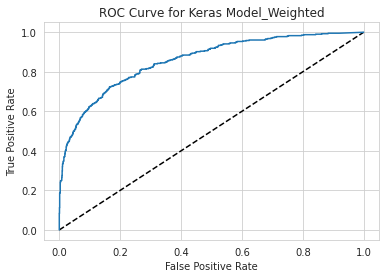

In [71]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [72]:
roc_auc_score(y_test, y_pred_proba)

0.8573519590468744

The Evaluation of ROC and AUC for GridsearchCV Model"

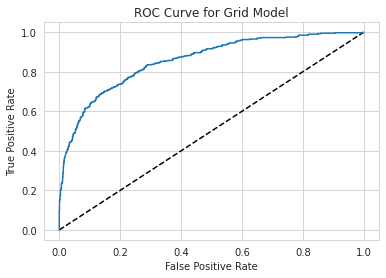

In [73]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [74]:
roc_auc_score(y_test, y_pred_proba)

0.8576018237035187

## Final Model and Model Deployment

In [75]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [76]:
final_model  = Sequential()
final_model.add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
final_model.add(Dense(10, activation='relu'))
final_model.add(Dense(5,  activation = 'relu'))
final_model.add(Dense(1, activation='sigmoid'))
final_model.summary()


# compile the model
opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data

class_weight = {0:0.62794349 , 1:2.45398773}

final_model.fit(x=X_train, y=y_train, epochs=250, batch_size=32, validation_data = (X_test, y_test), verbose=1,
                    class_weight=class_weight,
                    callbacks = [early_stop])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                180       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
250/250 [==============================] - 1s 3ms/step - loss: 0.6352 - accuracy: 0.6606 - val_loss: 0.6590 - val_accuracy: 0.6280
Epoch 2/250
250/250 [========================

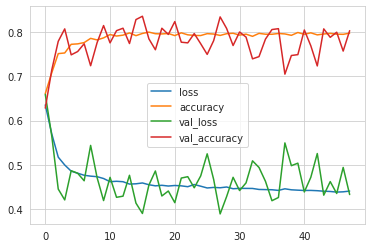

In [77]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [78]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1301  292]
 [ 103  304]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.51      0.75      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



In [79]:
model.save('model_churn.h5')

Loading Model and Scaler

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model_churn = load_model('model_churn.h5')

scaler_churn = pickle.load(open("scaler_churn", "rb"))

### Prediction

In [88]:
random_ten_customer = df.drop('churn', axis = 1).sample(n=10, random_state=101).iloc[0:10, :]

random_ten_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6676,619,52,8,0.000,2,1,1,123242.110,0,1,1
6421,616,23,8,73112.950,1,1,1,62733.050,0,0,1
9834,516,46,6,62212.290,1,0,1,171681.860,0,0,0
8492,494,28,9,114731.760,2,0,1,79479.740,0,0,1
9982,655,46,7,137145.120,1,1,0,115146.400,1,0,0
8844,695,35,7,0.000,2,1,0,160387.980,0,1,1
7247,582,40,3,110150.430,1,1,1,191757.650,1,0,0
5862,682,40,4,0.000,2,1,1,140745.910,0,0,1
3662,632,28,5,118890.810,1,0,1,145157.970,0,0,0
3457,657,36,8,188241.050,2,0,0,183058.510,0,1,1


In [89]:
random_ten_customer = scaler_churn.transform(random_ten_customer)

random_ten_customer

array([[0.538     , 0.45945946, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.6162115 , 0.        , 1.        ,
        1.        ],
       [0.532     , 0.06756757, 0.8       , 0.30669784, 0.        ,
        1.        , 1.        , 0.3136373 , 0.        , 0.        ,
        1.        ],
       [0.332     , 0.37837838, 0.6       , 0.26097121, 0.        ,
        0.        , 1.        , 0.85843338, 0.        , 0.        ,
        0.        ],
       [0.288     , 0.13513514, 0.9       , 0.4812825 , 0.33333333,
        0.        , 1.        , 0.39737875, 0.        , 0.        ,
        1.        ],
       [0.61      , 0.37837838, 0.7       , 0.57530317, 0.        ,
        1.        , 0.        , 0.57572908, 1.        , 0.        ,
        0.        ],
       [0.69      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 0.        , 0.80195859, 0.        , 1.        ,
        1.        ],
       [0.464     , 0.2972973 , 0.3       , 0.46206451, 0.

In [90]:
prediction = pd.DataFrame(model_churn.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("int32")
prediction

,prediction
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [91]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["churn"]).rename({'churn': 'actual'}, axis=1).astype("int32")
actual 

,actual
6676,0
6421,0
9834,1
8492,0
9982,1
8844,0
7247,1
5862,0
3662,0
3457,1


In [92]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0,0
6421,0,0
9834,1,1
8492,0,0
9982,1,1
8844,0,0
7247,1,0
5862,0,0
3662,0,0
3457,1,0


In [93]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['actual'] == x['prediction']) else "Wrong Pred", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0,0,Correct Pred
6421,0,0,Correct Pred
9834,1,1,Correct Pred
8492,0,0,Correct Pred
9982,1,1,Correct Pred
8844,0,0,Correct Pred
7247,1,0,Wrong Pred
5862,0,0,Correct Pred
3662,0,0,Correct Pred
3457,1,0,Wrong Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___